In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob # 用于查找文件
import matplotlib

# --- [新代码] 解决中文显示问题 (Seaborn 正确版) ---

# 你的测试代码证明了 'SimHei' 字体是可用的。
# 我们在 set_theme() 中直接把它传进去
font_name_to_use = 'SimHei' 

# 1. 在调用 set_theme 时，直接指定 font 参数
# 这样 Seaborn 就会在加载 'whitegrid' 样式时，主动使用 'SimHei' 字体
sns.set_theme(style="whitegrid", font=font_name_to_use)

# 2. 解决更改字体后，负号 '-' 显示为方块的问题
plt.rcParams['axes.unicode_minus'] = False 
# --- [新代码] 结束 ---

print(f"库导入成功！中文显示已配置，Seaborn 正在使用: {font_name_to_use}")

库导入成功！中文显示已配置，Seaborn 正在使用: SimHei


In [2]:
# 步骤 1.2：加载并合并数据

# ../ 返回到项目根目录，然后直接进入 'results'
pred_path = '../experiments/results/variable-discharge/predictions/'
print(f"检查路径: {pred_path}")

# (!!!) 这是关键修改 (!!!)
# 我们去加载 'eis-cvfs-ct-c-actions' 的结果, 因为这才是 1next-cycle-capacity.py 实际生成的文件
glob_pattern_pred = 'pred_mn_eis-cvfs-ct-c-actions_n1_xgb_*.npy'
glob_pattern_true = 'true_eis-cvfs-ct-c-actions_n1_xgb_*.npy'

# 查找所有相关的预测文件和真实值文件
pred_files = sorted(glob.glob(os.path.join(pred_path, glob_pattern_pred)))
true_files = sorted(glob.glob(os.path.join(pred_path, glob_pattern_true)))

# 检查是否找到了文件
if not pred_files:
    print(f"!!! 错误：在 {pred_path} 中没有找到 '{glob_pattern_pred}' 文件")
    print("请确认你的 '1next-cycle-capacity.py' 脚本是否已成功运行并生成了结果。")
else:
    print(f"成功找到了 {len(pred_files)} 组 {glob_pattern_pred} 文件。")

# 加载并合并数据
all_predictions = []
all_true_values = []

for p_file, t_file in zip(pred_files, true_files):
    all_predictions.append(np.load(p_file))
    all_true_values.append(np.load(t_file))

# 将列表合并成一个大的 Numpy 数组
predictions = np.hstack(all_predictions)
true_values = np.hstack(all_true_values)

# 计算绝对误差，用于图表着色
abs_error = np.abs(predictions - true_values)

print(f"成功加载了 {len(pred_files)} 组交叉验证数据")
print(f"总数据点: {len(predictions)}")

检查路径: ../experiments/results/variable-discharge/predictions/
成功找到了 24 组 pred_mn_eis-cvfs-ct-c-actions_n1_xgb_*.npy 文件。
成功加载了 24 组交叉验证数据
总数据点: 2866


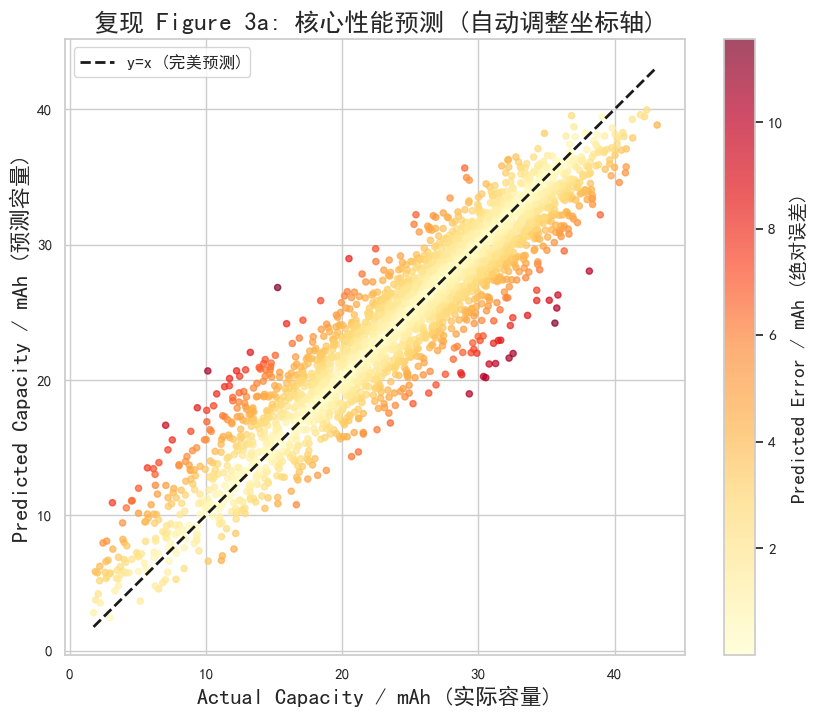

In [3]:
# 步骤 1.3：绘制 Figure 3a (自动调整坐标轴)

plt.figure(figsize=(10, 8))

# 绘制散点图
# c=abs_error: 用绝对误差来着色
# cmap='YlOrRd': 使用和论文一致的黄-橙-红配色
sc = plt.scatter(true_values, predictions, c=abs_error, cmap='YlOrRd', alpha=0.7, s=20)

# [修改] 我们仍然需要计算最小/最大值，但这只用于绘制 y=x 对角线
all_data = np.concatenate([true_values, predictions])
min_val = np.min(all_data)
max_val = np.max(all_data)
plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2, label='y=x (完美预测)')

# 添加颜色条
cbar = plt.colorbar(sc)
cbar.set_label('Predicted Error / mAh (绝对误差)', fontsize=14)

# 设置标签和标题
plt.xlabel('Actual Capacity / mAh (实际容量)', fontsize=16)
plt.ylabel('Predicted Capacity / mAh (预测容量)', fontsize=16)
plt.title('复现 Figure 3a: 核心性能预测 (自动调整坐标轴)', fontsize=18)
plt.legend(fontsize=12)

# [修改] 删除了 plt.axis('equal'), plt.xlim(...), plt.ylim(...)
# Matplotlib 将自动调整坐标轴以适应数据

plt.grid(True)
plt.show()

In [4]:
# 定义数据路径
data_path = '../experiments/results/fixed-discharge/predictions/'

# 加载数据
pred_robust = np.load(os.path.join(data_path, 'pred_mn_eis-actions.npy'))
true_robust = np.load(os.path.join(data_path, 'true_eis-actions.npy'))

# 计算绝对误差，用于着色
abs_error_robust = np.abs(pred_robust - true_robust)

print(f"成功加载了鲁棒性测试数据，数据点: {len(pred_robust)}")

成功加载了鲁棒性测试数据，数据点: 1884


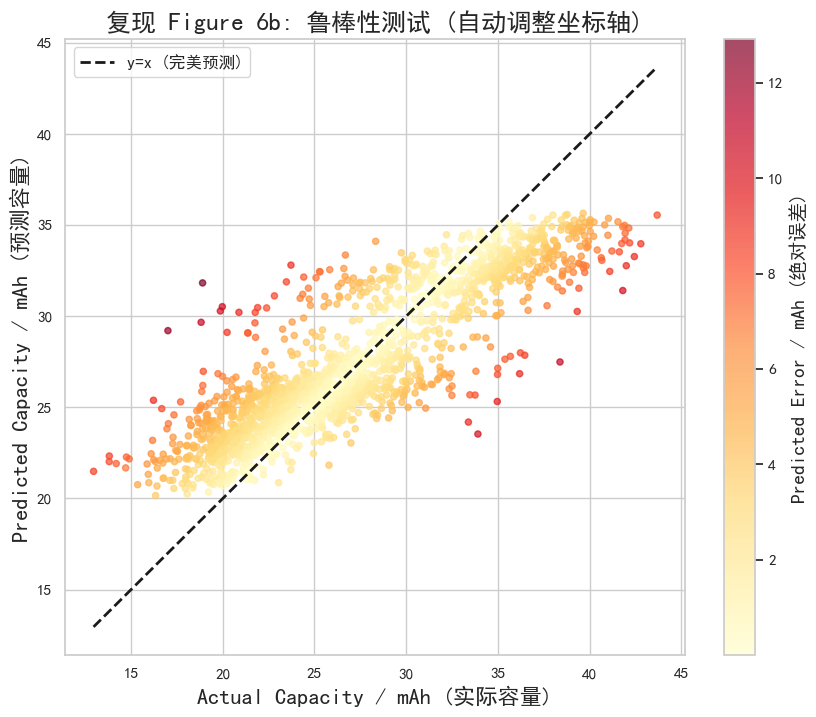

In [5]:
# 步骤 2.2：绘制 Figure 6b (自动调整坐标轴)

plt.figure(figsize=(10, 8))

# 绘制散点图
sc_robust = plt.scatter(true_robust, pred_robust, c=abs_error_robust, cmap='YlOrRd', alpha=0.7, s=20)

# [修改] 计算对角线 (y=x) 的范围
all_data_robust = np.concatenate([true_robust, pred_robust])
min_val_robust = np.min(all_data_robust)
max_val_robust = np.max(all_data_robust)
plt.plot([min_val_robust, max_val_robust], [min_val_robust, max_val_robust], 'k--', lw=2, label='y=x (完美预测)')

# 添加颜色条
cbar_robust = plt.colorbar(sc_robust)
cbar_robust.set_label('Predicted Error / mAh (绝对误差)', fontsize=14)

# 设置标签和标题
plt.xlabel('Actual Capacity / mAh (实际容量)', fontsize=16)
plt.ylabel('Predicted Capacity / mAh (预测容量)', fontsize=16)
plt.title('复现 Figure 6b: 鲁棒性测试 (自动调整坐标轴)', fontsize=18)
plt.legend(fontsize=12)

# [修改] 删除了 plt.axis('equal'), plt.xlim(...), plt.ylim(...)

plt.grid(True)
plt.show()

In [6]:
import re # 导入正则表达式库
import pandas as pd # 导入 Pandas 库

# (!!!) 确保这个路径是正确的 (!!!)
log_file_path = '../experiments/results/variable-discharge/log-next-cycle-12s.txt'

# 用于存放我们提取的数据
core_results = []

# 定义正则表达式
# 匹配 "Input: X"
input_regex = re.compile(r'Input: ([\w-]+)') 

# 匹配 "Test R2: Y   Test error: Z"
# (我们沿用之前成功的正则表达式)
stats_regex = re.compile(r'Test R2: ([\d.-]+)\s+ Test error: ([\d.-]+)')

current_input = None

try:
    with open(log_file_path, 'r', encoding='utf-8') as f:
        for line in f:
            # 1. 查找 "Input: X" 这一行
            input_match = input_regex.search(line)
            if input_match:
                # 找到了，把 X 存为特征名称
                current_input = input_match.group(1)
            
            # 2. 查找 "Test R2: Y Test error: Z" 这一行
            stats_match = stats_regex.search(line)
            if stats_match and current_input is not None:
                # 找到了，把 Y 和 Z 和 X 存到一起
                core_results.append({
                    'Feature Set': current_input,
                    'Test R2': float(stats_match.group(1)),
                    'Test error (%)': float(stats_match.group(2))
                })
                # 重置 current_input，防止重复记录
                current_input = None

    # 将结果转换为 Pandas DataFrame
    df_core = pd.DataFrame(core_results)
    
    if df_core.empty:
        print(f"!!! 错误：无法从 {log_file_path} 中解析出任何数据。")
        print("请检查日志文件内容和正则表达式是否匹配。")
    else:
        # 按 "Test error (%)" 排序，看看哪个特征最好
        df_core = df_core.sort_values(by='Test error (%)')
        
        print("成功解析 'log-next-cycle-12s.txt' (任务 3) 文件：")
        print(df_core)

except FileNotFoundError:
    print(f"!!! 错误：找不到日志文件 {log_file_path}")
    print("请确认 '1next-cycle-capacity.py' (任务 3) 脚本是否已成功运行。")

成功解析 'log-next-cycle-12s.txt' (任务 3) 文件：
               Feature Set   Test R2  Test error (%)
0   ecmr-cvfs-ct-c-actions  0.877678        6.642354
1  ecmer-cvfs-ct-c-actions  0.880459        6.704235
2    eis-cvfs-ct-c-actions  0.887006        6.893060


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_34072\661650637.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Test error (%)', y='Feature Set', data=df_core, ax=axes[0], palette='Reds')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_34072\661650637.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Test R2', y='Feature Set', data=df_core_r2_sorted, ax=axes[1], palette='Blues')
Font 'default' does not have a glyph for '\xb2' [U+b2], substituting with a dummy symbol.
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_34072\661650637.py:23: UserWarning: Glyph 178 (\N{SUPERSCRIPT TWO}) missing from font(s) SimHei.
  plt.tight_layout()
Font 'default' does not have a glyph for '\xb2' [U+b2], 

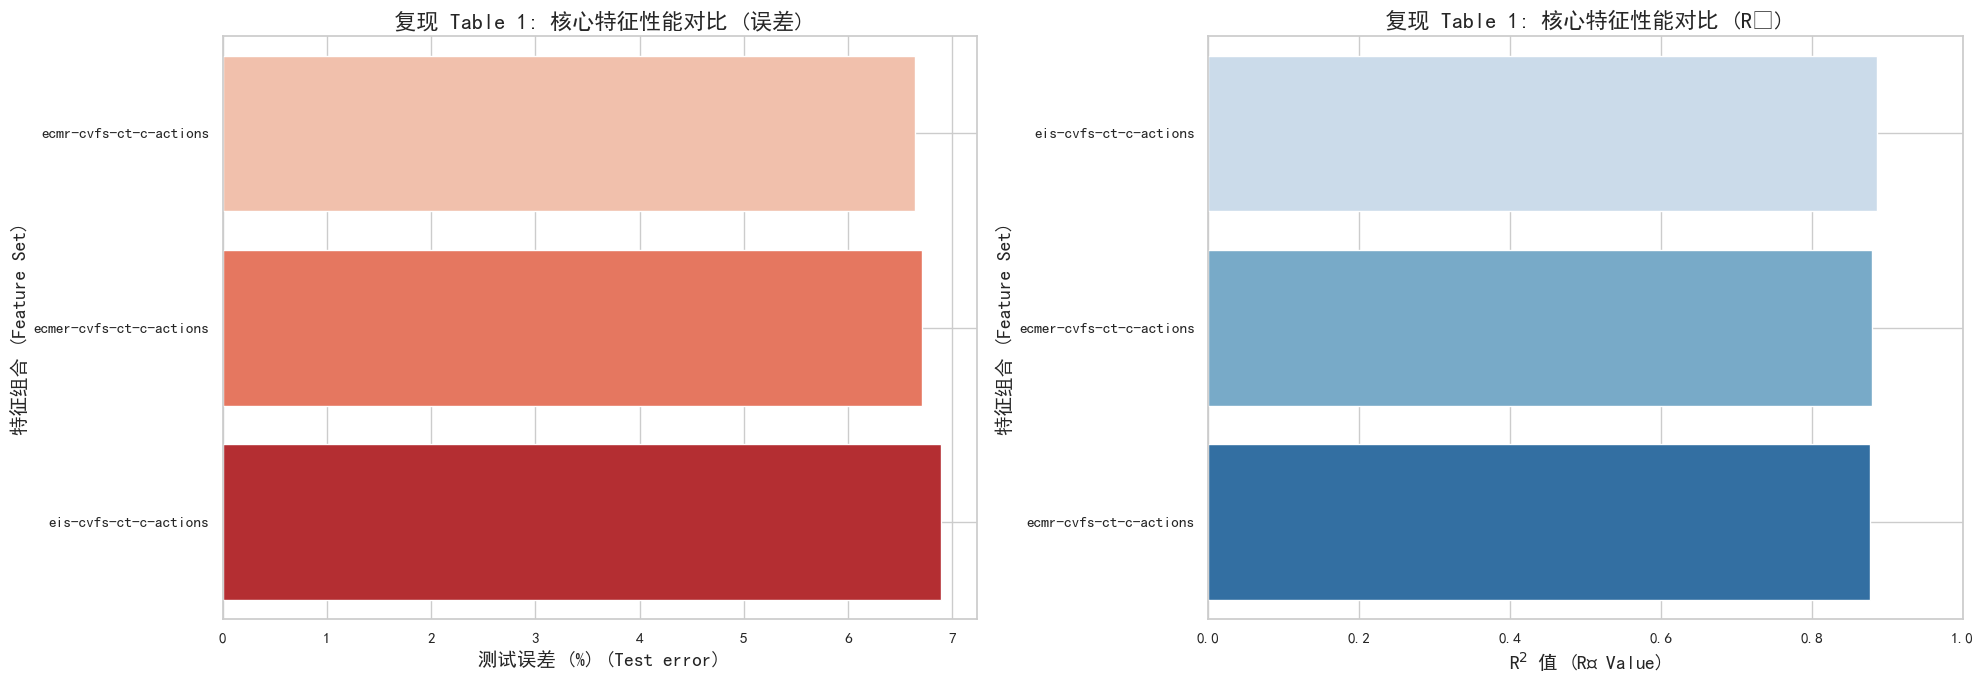

In [7]:
if 'df_core' in locals() and not df_core.empty:
    # 创建一个 1 行 2 列的图表
    fig, axes = plt.subplots(1, 2, figsize=(20, 7))

    # --- 绘制 图 8.2a: 测试误差 (%) ---
    sns.barplot(x='Test error (%)', y='Feature Set', data=df_core, ax=axes[0], palette='Reds')
    axes[0].set_xlabel('测试误差 (%) (Test error)', fontsize=14)
    axes[0].set_ylabel('特征组合 (Feature Set)', fontsize=14)
    axes[0].set_title('复现 Table 1: 核心特征性能对比 (误差)', fontsize=16)
    axes[0].grid(True)

    # --- 绘制 图 8.2b: R² 值 ---
    # 按 R2 降序排列
    df_core_r2_sorted = df_core.sort_values(by='Test R2', ascending=False)
    sns.barplot(x='Test R2', y='Feature Set', data=df_core_r2_sorted, ax=axes[1], palette='Blues')
    axes[1].set_xlabel('R$^2$ 值 (R² Value)', fontsize=14)
    axes[1].set_ylabel('特征组合 (Feature Set)', fontsize=14)
    axes[1].set_title('复现 Table 1: 核心特征性能对比 (R²)', fontsize=16)
    axes[1].set_xlim(0, 1.0) # R2 范围从 0 到 1
    axes[1].grid(True)

    # 自动调整布局
    plt.tight_layout()
    plt.show()
else:
    print("错误：'df_core' DataFrame 不存在或为空。请先成功运行上一个单元格。")

In [8]:
input_names = [
    'actions',              # 对应 "Protocol only"
    'eis',                  # 对应 "EIS only"
    'eis-actions',          # 对应 "EIS + Protocol"
    'ecmr-actions',         # 对应 "ECM-R + Protocol"
    'ecmer-actions',        # 对应 "ECM-ER + Protocol"
    'soh-actions',          # 对应 "SOH + Protocol" (近似)
    'cvfs-actions',         # 对应 "CVF + Protocol"
    'ct-actions',           # 对应 "CT + Protocol" (近似)
    'c-actions',            # 对应 "Qn-1 + Protocol" (近似)
    'eis-cvfs-actions',     # 对应 "EIS + CVF + Protocol"
    'eis-cvfs-ct-c-actions' # 对应 "EIS + CVF + CT+Q-1+ Protocol"
]
#如果你想完整复现论文中的 Table 1，你必须：

#打开 experiments/1next-cycle-capacity.py。

#修改 input_names 列表，把 Table 1 中的所有特征集都加进去。根据 utils/exp_util.py 的定义，它们的名字是input_names

In [9]:
import re # 导入正则表达式库
import pandas as pd # 导入 Pandas 库

# (!!!) 确保这个路径是正确的 (!!!)
log_file_path = '../experiments/results/variable-discharge/log-n-cells.txt'

# 用于存放我们提取的数据
data_efficiency_results = []

# (!!!) [已修正] 这是你日志中的关键信息 (e.g., "Splits:2", "Splits:4")
# 我们用它来代表电芯数量
cell_regex = re.compile(r'Splits:(\d+)') 

# (!!!) [已修正] 这是你日志中对应的统计数据
# Train R2: ... Train error: ... Test R2: [我们要的] Test error: [我们要的]
stats_regex = re.compile(r'Test R2: ([\d.-]+)\s+ Test error: ([\d.-]+)')

current_cells = None

try:
    with open(log_file_path, 'r', encoding='utf-8') as f:
        for line in f:
            # 1. 查找 "Splits:X" 这一行
            cell_match = cell_regex.search(line)
            if cell_match:
                # 找到了，把 X 存为电芯数量
                current_cells = int(cell_match.group(1))
            
            # 2. 查找 "Test R2: Y Test error: Z" 这一行
            stats_match = stats_regex.search(line)
            if stats_match and current_cells is not None:
                # 找到了，把 Y 和 Z 和 X 存到一起
                data_efficiency_results.append({
                    'Number of cells': current_cells,
                    'Test R2': float(stats_match.group(1)),
                    'Test error (%)': float(stats_match.group(2))
                })
                # 重置 current_cells，防止重复记录
                current_cells = None

    # 将结果转换为 Pandas DataFrame
    df_efficiency = pd.DataFrame(data_efficiency_results)
    
    if df_efficiency.empty:
        print(f"!!! 错误：无法从 {log_file_path} 中解析出任何数据。")
        print("请检查日志文件内容和正则表达式是否匹配。")
    else:
        # 按 "Number of cells" 排序，确保绘图时 X 轴是递增的
        df_efficiency = df_efficiency.sort_values(by='Number of cells')
        
        print("成功解析 'log-n-cells.txt' 文件：")
        print(df_efficiency)

except FileNotFoundError:
    print(f"!!! 错误：找不到日志文件 {log_file_path}")
    print("请确认 '1data-efficiency.py' 脚本是否已成功运行。")

成功解析 'log-n-cells.txt' 文件：
   Number of cells   Test R2  Test error (%)
0                2  0.430611       15.070435
1                4  0.609102       11.175672
2                8  0.711421       10.226432
3               16  0.767582        9.714865
4               20  0.780117        8.816158


Font 'default' does not have a glyph for '\xb2' [U+b2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\xb2' [U+b2], substituting with a dummy symbol.


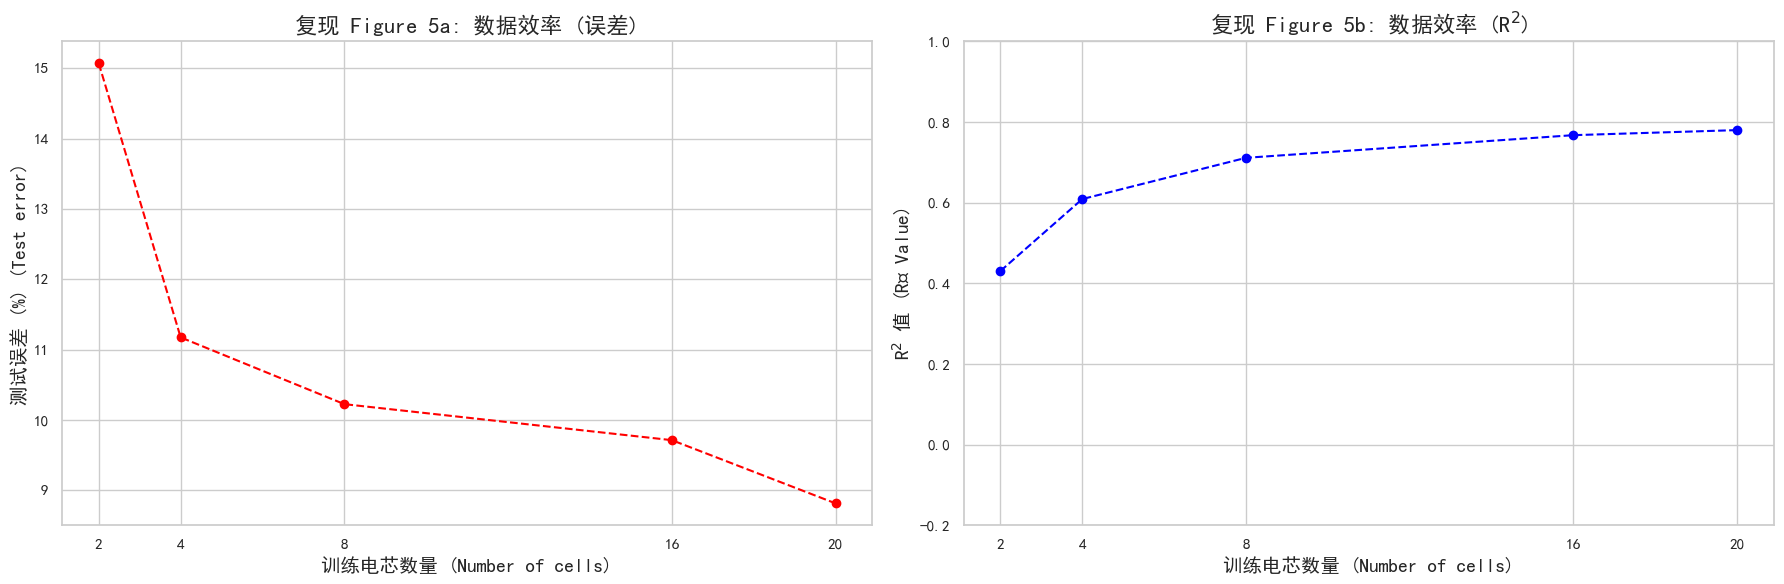

In [10]:
if 'df_efficiency' in locals() and not df_efficiency.empty:
    # 创建一个 1 行 2 列的图表
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))

    # --- 绘制 Figure 5a: 测试误差 vs 电芯数量 ---
    axes[0].plot(df_efficiency['Number of cells'], df_efficiency['Test error (%)'], 
                 marker='o', linestyle='--', color='red')
    axes[0].set_xlabel('训练电芯数量 (Number of cells)', fontsize=14)
    axes[0].set_ylabel('测试误差 (%) (Test error)', fontsize=14)
    axes[0].set_title('复现 Figure 5a: 数据效率 (误差)', fontsize=16)
    axes[0].grid(True)
    # 设置 X 轴刻度为我们实际拥有的数据点
    axes[0].set_xticks(df_efficiency['Number of cells']) 

    # --- 绘制 Figure 5b: R² vs 电芯数量 ---
    
    # (!!!) [已修正] 使用 LaTeX 字符串 R$^2$ 来显示 R²
    axes[1].plot(df_efficiency['Number of cells'], df_efficiency['Test R2'], 
                 marker='o', linestyle='--', color='blue')
    axes[1].set_xlabel('训练电芯数量 (Number of cells)', fontsize=14)
    axes[1].set_ylabel('R$^2$ 值 (R² Value)', fontsize=14) # <--- 看这里！
    axes[1].set_title('复现 Figure 5b: 数据效率 (R$^2$)', fontsize=16)
    
    axes[1].grid(True)
    # 设置 X 轴刻度
    axes[1].set_xticks(df_efficiency['Number of cells'])
    # 设置 Y 轴范围，使其更接近论文样式
    axes[1].set_ylim(-0.2, 1.0) 

    # 自动调整布局
    plt.tight_layout()
    plt.show()
else:
    print("错误：'df_efficiency' DataFrame 不存在或为空。请先成功运行上一个单元格。")

In [11]:
#

In [12]:
import re # 导入正则表达式库
import pandas as pd # 导入 Pandas 库

# (!!!) 确保这个路径是正确的 (!!!)
log_file_path = '../experiments/results/variable-discharge/log-n-step-lookahead.txt'

# 用于存放我们提取的数据
n_step_results = []

# 定义正则表达式
# 匹配 "Output: Q_n+X"
step_regex = re.compile(r'Output: Q_n\+(\d+)') 

# 匹配 "Test R2: Y   Test error: Z"
# (我们沿用上次成功的、带空格的正则表达式)
stats_regex = re.compile(r'Test R2: ([\d.-]+)\s+ Test error: ([\d.-]+)')

current_step = None

try:
    with open(log_file_path, 'r', encoding='utf-8') as f:
        for line in f:
            # 1. 查找 "Output: Q_n+X" 这一行
            step_match = step_regex.search(line)
            if step_match:
                # 找到了，把 X 存为步长
                current_step = int(step_match.group(1))
            
            # 2. 查找 "Test R2: Y Test error: Z" 这一行
            stats_match = stats_regex.search(line)
            if stats_match and current_step is not None:
                # 找到了，把 Y 和 Z 和 X 存到一起
                n_step_results.append({
                    'n_step': current_step,
                    'Test R2': float(stats_match.group(1)),
                    'Test error (%)': float(stats_match.group(2))
                })
                # 重置 current_step，防止重复记录
                current_step = None

    # 将结果转换为 Pandas DataFrame
    df_n_step = pd.DataFrame(n_step_results)
    
    if df_n_step.empty:
        print(f"!!! 错误：无法从 {log_file_path} 中解析出任何数据。")
        print("请检查日志文件内容和正则表达式是否匹配。")
    else:
        # 按 "n_step" 排序，确保绘图时 X 轴是递增的
        df_n_step = df_n_step.sort_values(by='n_step')
        
        print("成功解析 'log-n-step-lookahead.txt' 文件：")
        print(df_n_step)

except FileNotFoundError:
    print(f"!!! 错误：找不到日志文件 {log_file_path}")
    print("请确认 '1n-step-lookahead.py' 脚本是否已成功运行。")

成功解析 'log-n-step-lookahead.txt' 文件：
   n_step   Test R2  Test error (%)
0       1  0.817068        8.362487
1       2  0.777541        9.132762
2       4  0.781453        9.343888
3       8  0.733245        9.472631
4      12  0.736037        9.332363
5      16  0.736107        9.138553
6      20  0.755118        9.090749
7      24  0.765735        9.095146
8      32  0.768845        9.340517
9      40  0.743855        9.402414


Font 'default' does not have a glyph for '\xb2' [U+b2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\xb2' [U+b2], substituting with a dummy symbol.


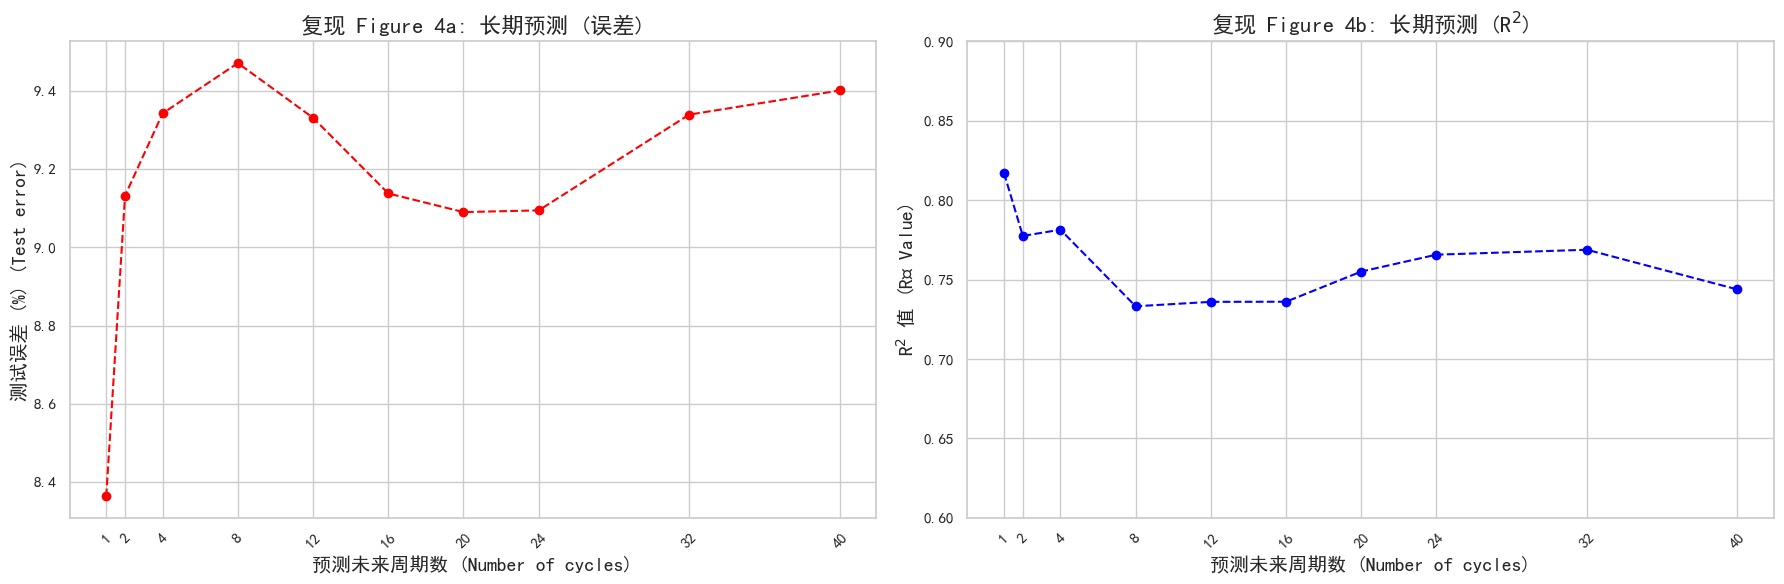

In [13]:
if 'df_n_step' in locals() and not df_n_step.empty:
    # 创建一个 1 行 2 列的图表
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))

    # --- 绘制 Figure 4a: 测试误差 vs 预测步长 ---
    axes[0].plot(df_n_step['n_step'], df_n_step['Test error (%)'], 
                 marker='o', linestyle='--', color='red')
    axes[0].set_xlabel('预测未来周期数 (Number of cycles)', fontsize=14)
    axes[0].set_ylabel('测试误差 (%) (Test error)', fontsize=14)
    axes[0].set_title('复现 Figure 4a: 长期预测 (误差)', fontsize=16)
    axes[0].grid(True)
    # 设置 X 轴刻度为我们实际拥有的数据点
    axes[0].set_xticks(df_n_step['n_step']) 
    # 调整X轴标签角度，防止重叠
    axes[0].tick_params(axis='x', rotation=45)

    # --- 绘制 Figure 4b: R² vs 预测步长 ---
    axes[1].plot(df_n_step['n_step'], df_n_step['Test R2'], 
                 marker='o', linestyle='--', color='blue')
    axes[1].set_xlabel('预测未来周期数 (Number of cycles)', fontsize=14)
    # 使用 LaTeX 字符串 R$^2$ 来显示 R²
    axes[1].set_ylabel('R$^2$ 值 (R² Value)', fontsize=14)
    axes[1].set_title('复现 Figure 4b: 长期预测 (R$^2$)', fontsize=16)
    axes[1].grid(True)
    # 设置 X 轴刻度
    axes[1].set_xticks(df_n_step['n_step'])
    # 设置 Y 轴范围，使其更接近论文样式
    axes[1].set_ylim(0.6, 0.9) # 论文中的 Y 轴范围是 0.6 到 0.9
    axes[1].tick_params(axis='x', rotation=45)

    # 自动调整布局
    plt.tight_layout()
    plt.show()
else:
    print("错误：'df_n_step' DataFrame 不存在或为空。请先成功运行上一个单元格。")

In [14]:
#解析任务七日志(log-next-cycle-random-split-32.txt)

In [15]:
import re # 导入正则表达式库
import pandas as pd # 导入 Pandas 库


# (!!!) 确保这个路径是正确的 (!!!)
log_file_path = '../experiments/results/variable-discharge-type2/log-next-cycle-random-split-32.txt'

# 用于存放我们提取的数据
vd2_results = []

# 定义正则表达式
# 匹配 "Input: X"
input_regex = re.compile(r'Input: ([\w-]+)') 

# 匹配 "Test R2: Y   Test error: Z"
# (我们沿用之前成功的正则表达式)
stats_regex = re.compile(r'Test R2: ([\d.-]+)\s+ Test error: ([\d.-]+)')

current_input = None

try:
    with open(log_file_path, 'r', encoding='utf-8') as f:
        for line in f:
            # 1. 查找 "Input: X" 这一行
            input_match = input_regex.search(line)
            if input_match:
                # 找到了，把 X 存为特征名称
                current_input = input_match.group(1)
            
            # 2. 查找 "Test R2: Y Test error: Z" 这一行
            stats_match = stats_regex.search(line)
            if stats_match and current_input is not None:
                # 找到了，把 Y 和 Z 和 X 存到一起
                vd2_results.append({
                    'Feature Set': current_input,
                    'Test R2': float(stats_match.group(1)),
                    'Test error (%)': float(stats_match.group(2))
                })
                # 重置 current_input，防止重复记录
                current_input = None

    # 将结果转换为 Pandas DataFrame
    df_vd2 = pd.DataFrame(vd2_results)
    
    if df_vd2.empty:
        print(f"!!! 错误：无法从 {log_file_path} 中解析出任何数据。")
        print("请检查日志文件内容和正则表达式是否匹配。")
    else:
        # 按 "Test error (%)" 排序，看看哪个特征最好
        df_vd2 = df_vd2.sort_values(by='Test error (%)')
        
        print("成功解析 'log-next-cycle-random-split-32.txt' (任务 7) 文件：")
        print(df_vd2)

except FileNotFoundError:
    print(f"!!! 错误：找不到日志文件 {log_file_path}")
    print("请确认 '2next-cycle-capacity-vd2.py' (任务 7) 脚本是否已成功运行。")

成功解析 'log-next-cycle-random-split-32.txt' (任务 7) 文件：
                Feature Set   Test R2  Test error (%)
7          eis-cvfs-actions  0.727256       15.576514
11    eis-cvfs-ct-c-actions  0.734682       16.440847
10  ecmer-cvfs-ct-c-actions  0.752681       17.947719
5        ecmer-cvfs-actions  0.751024       17.992604
6         ecmr-cvfs-actions  0.744948       18.190543
1              cvfs-actions  0.581913       18.425128
9    ecmr-cvfs-ct-c-actions  0.706073       18.777317
2               eis-actions  0.612415       19.267802
8                 c-actions  0.415586       22.746406
4              ecmr-actions  0.405653       24.929099
3             ecmer-actions  0.351007       25.747771
0                   actions -0.135071       30.607734


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_34072\4127835945.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Test error (%)', y='Feature Set', data=df_vd2, ax=axes[0], palette='Reds')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_34072\4127835945.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Test R2', y='Feature Set', data=df_vd2_r2_sorted, ax=axes[1], palette='Blues')
Font 'default' does not have a glyph for '\xb2' [U+b2], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\xb2' [U+b2], substituting with a dummy symbol.


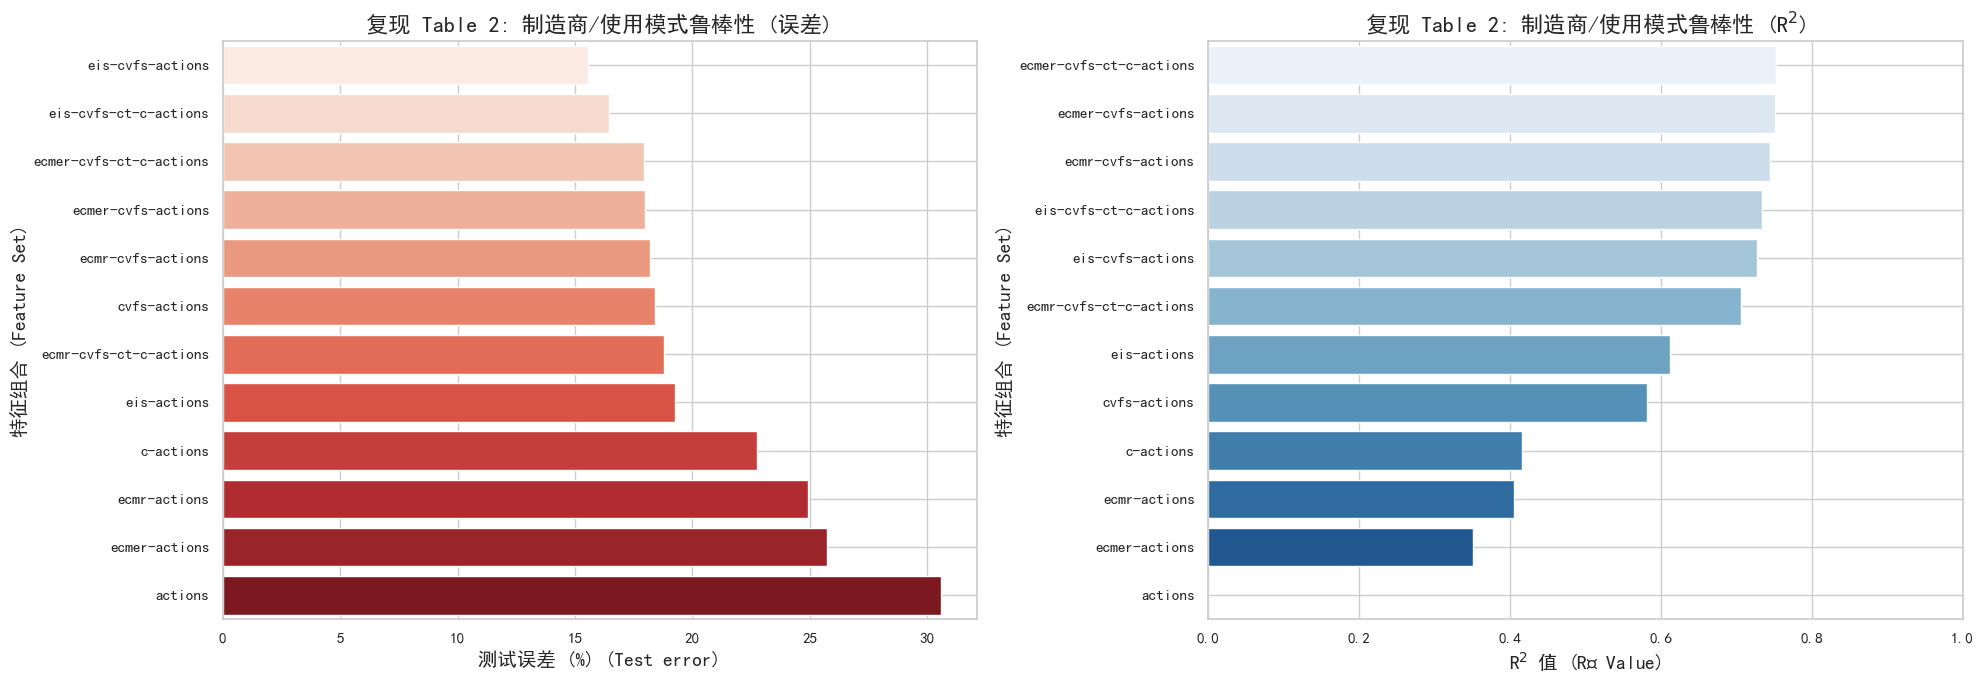

In [16]:
if 'df_vd2' in locals() and not df_vd2.empty:
    # 创建一个 1 行 2 列的图表
    fig, axes = plt.subplots(1, 2, figsize=(20, 7))

    # --- 绘制 图 5.2a: 测试误差 (%) ---
    sns.barplot(x='Test error (%)', y='Feature Set', data=df_vd2, ax=axes[0], palette='Reds')
    axes[0].set_xlabel('测试误差 (%) (Test error)', fontsize=14)
    axes[0].set_ylabel('特征组合 (Feature Set)', fontsize=14)
    axes[0].set_title('复现 Table 2: 制造商/使用模式鲁棒性 (误差)', fontsize=16)
    axes[0].grid(True)

    # --- 绘制 图 5.2b: R² 值 ---
    # 按 R2 降序排列
    df_vd2_r2_sorted = df_vd2.sort_values(by='Test R2', ascending=False)
    sns.barplot(x='Test R2', y='Feature Set', data=df_vd2_r2_sorted, ax=axes[1], palette='Blues')
    axes[1].set_xlabel('R$^2$ 值 (R² Value)', fontsize=14)
    axes[1].set_ylabel('特征组合 (Feature Set)', fontsize=14)
    axes[1].set_title('复现 Table 2: 制造商/使用模式鲁棒性 (R$^2$)', fontsize=16)
    axes[1].set_xlim(0, 1.0) # R2 范围从 0 到 1
    axes[1].grid(True)

    # 自动调整布局
    plt.tight_layout()
    plt.show()
else:
    print("错误：'df_vd2' DataFrame 不存在或为空。请先成功运行上一个单元格。")

In [17]:
from sklearn.metrics import r2_score # 导入 R2 评估工具

# (!!!) 确保这个路径是正确的 (!!!)
# 这是 '2vd2-predict.py' 脚本中定义的 'exp_test'
data_path = '../experiments/results/vd2-35C/predictions/'

# '2vd2-predict.py' 脚本中硬编码了 input_name = 'eis-actions'
input_name = 'eis-actions'

# 定义文件名
pred_file = os.path.join(data_path, f'vd1_pred_mn_{input_name}.npy')
true_file = os.path.join(data_path, f'vd1_true_{input_name}.npy')

try:
    # 加载数据
    pred_temp = np.load(pred_file)
    true_temp = np.load(true_file)
    
    # 计算误差
    abs_error_temp = np.abs(pred_temp - true_temp)
    
    # 计算 R2 和 % Error
    r2_temp = r2_score(true_temp, pred_temp)
    percent_error_temp = np.median(abs_error_temp / true_temp) * 100
    
    print(f"成功加载了 {input_name} (任务 8) 数据，数据点: {len(pred_temp)}")
    print(f"--- 23°C -> 35°C 温度鲁棒性测试结果 (复现 Table 3) ---")
    print(f"    Test R2: {r2_temp:.4f}")
    print(f"    Test error: {percent_error_temp:.2f}%")

except FileNotFoundError:
    print(f"!!! 错误：找不到 .npy 文件 {pred_file} 或 {true_file}")
    print("请确认 '2vd2-predict.py' (任务 8) 脚本是否已成功运行。")

成功加载了 eis-actions (任务 8) 数据，数据点: 1506
--- 23°C -> 35°C 温度鲁棒性测试结果 (复现 Table 3) ---
    Test R2: -0.0606
    Test error: 34.05%


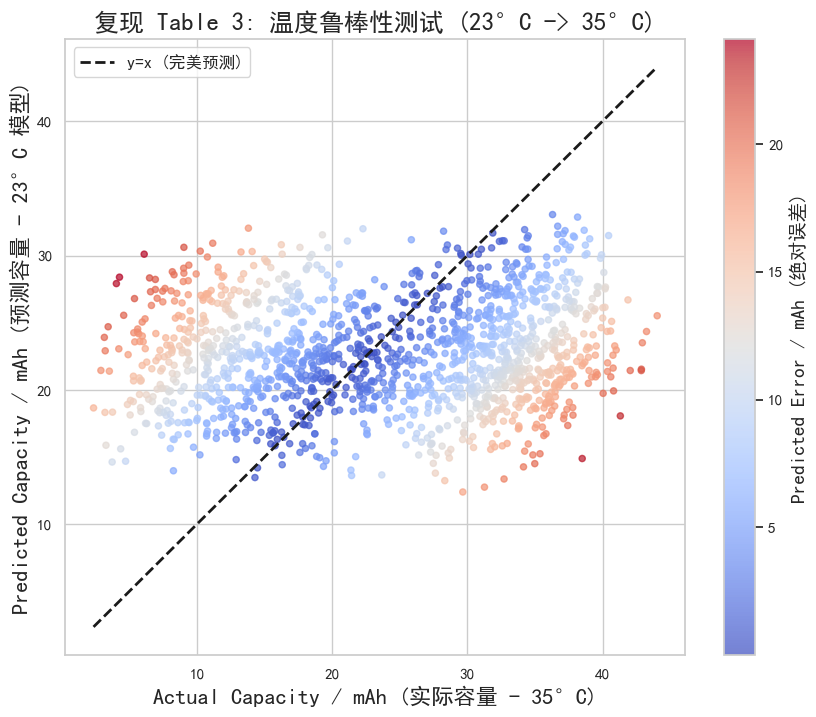

In [18]:
if 'pred_temp' in locals():
    plt.figure(figsize=(10, 8))

    # 绘制散点图
    sc_temp = plt.scatter(true_temp, pred_temp, c=abs_error_temp, cmap='coolwarm', alpha=0.7, s=20)

    # 绘制 y=x 对角线
    all_data_temp = np.concatenate([true_temp, pred_temp])
    min_val_temp = np.min(all_data_temp)
    max_val_temp = np.max(all_data_temp)
    plt.plot([min_val_temp, max_val_temp], [min_val_temp, max_val_temp], 'k--', lw=2, label='y=x (完美预测)')

    # 添加颜色条
    cbar_temp = plt.colorbar(sc_temp)
    cbar_temp.set_label('Predicted Error / mAh (绝对误差)', fontsize=14)

    # 设置标签和标题
    plt.xlabel('Actual Capacity / mAh (实际容量 - 35°C)', fontsize=16)
    plt.ylabel('Predicted Capacity / mAh (预测容量 - 23°C 模型)', fontsize=16)
    plt.title('复现 Table 3: 温度鲁棒性测试 (23°C -> 35°C)', fontsize=18)
    plt.legend(fontsize=12)

    # 自动调整坐标轴（因为我们删除了 plt.axis('equal')）
    plt.grid(True)
    plt.show()
else:
    print("错误：'pred_temp' 数据不存在。请先成功运行上一个单元格。")

In [21]:
#这个单元格会加载 variable-discharge-type2 实验的 .npy 预测文件。我们将选用 eis-actions 这个特征组合，因为它是在 Table 2 中与 Table 1 (eis-actions) 进行对比的基础特征。
import numpy as np
import os
import glob
from sklearn.metrics import r2_score, mean_squared_error

# (!!!) 确保这个路径是正确的 (!!!)
pred_path_vd2 = '../experiments/results/variable-discharge-type2/predictions/'

# (!!!) [关键] 检查文件名 (!!!)
# '2next-cycle-capacity-vd2.py' 生成的 .npy 文件
# 实验名称为 '{}_n1_xgb2'.format(input_name)
glob_pattern_pred = 'pred_mn_eis-actions_n1_xgb2_*.npy'
glob_pattern_true = 'true_eis-actions_n1_xgb2_*.npy'

# 查找所有相关的预测文件和真实值文件
pred_files_vd2 = sorted(glob.glob(os.path.join(pred_path_vd2, glob_pattern_pred)))
true_files_vd2 = sorted(glob.glob(os.path.join(pred_path_vd2, glob_pattern_true)))

try:
    if not pred_files_vd2:
        print(f"!!! 错误：在 {pred_path_vd2} 中没有找到 '{glob_pattern_pred}' 文件")
        print("请确认 '2next-cycle-capacity-vd2.py' (任务 7) 脚本是否已成功运行。")
    else:
        # 加载并合并数据
        all_predictions_vd2 = []
        all_true_values_vd2 = []

        for p_file, t_file in zip(pred_files_vd2, true_files_vd2):
            all_predictions_vd2.append(np.load(p_file))
            all_true_values_vd2.append(np.load(t_file))

        # 将列表合并成一个大的 Numpy 数组
        pred_vd2 = np.hstack(all_predictions_vd2)
        true_vd2 = np.hstack(all_true_values_vd2)

        # 计算绝对误差，用于图表着色
        abs_error_vd2 = np.abs(pred_vd2 - true_vd2)
        
        # 计算 R2 和 % Error (与 Table 2 日志进行核对)
        r2_vd2 = r2_score(true_vd2, pred_vd2)
        percent_error_vd2 = np.median(abs_error_vd2 / true_vd2) * 100

        print(f"成功加载了 {len(pred_files_vd2)} 组 'eis-actions' (任务 7) 交叉验证数据")
        print(f"总数据点: {len(pred_vd2)}")
        print(f"--- 'eis-actions' (Type 2 电芯) 性能指标 ---")
        print(f"    Test R2 (计算值): {r2_vd2:.4f}")
        print(f"    Test error (计算值): {percent_error_vd2:.2f}%")
        print("(你可以将此结果与 步骤 5.2 中 'eis-actions' 的条形图结果进行核对)")

except Exception as e:
    print(f"加载数据时出错: {e}")

成功加载了 11 组 'eis-actions' (任务 7) 交叉验证数据
总数据点: 1080
--- 'eis-actions' (Type 2 电芯) 性能指标 ---
    Test R2 (计算值): 0.7048
    Test error (计算值): 19.14%
(你可以将此结果与 步骤 5.2 中 'eis-actions' 的条形图结果进行核对)


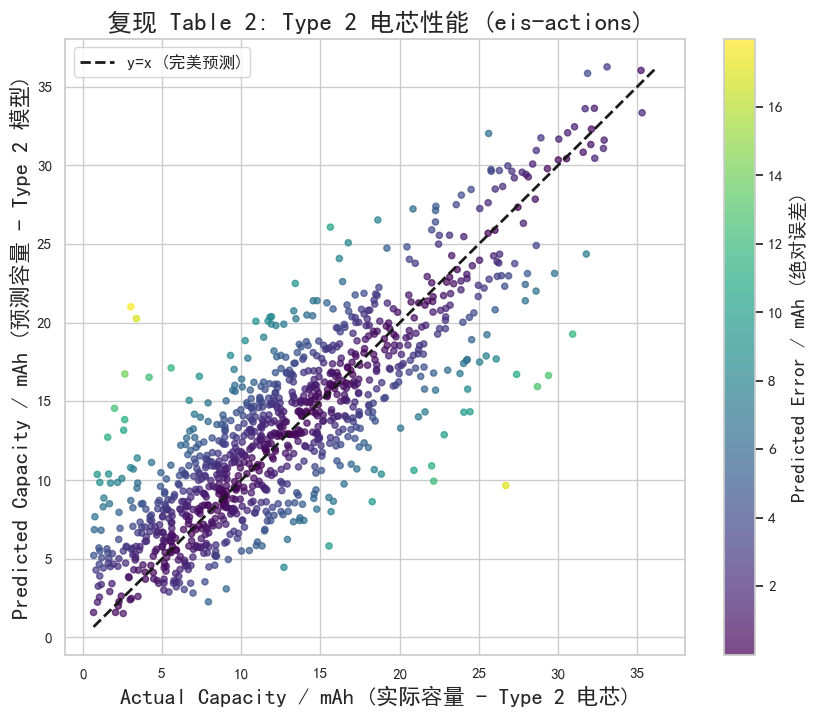

In [22]:
#把 pred_vd2 和 true_vd2 绘制成散点图，为 Table 2 提供直观的可视化
if 'pred_vd2' in locals():
    plt.figure(figsize=(10, 8))

    # 绘制散点图
    sc_vd2 = plt.scatter(true_vd2, pred_vd2, c=abs_error_vd2, cmap='viridis', alpha=0.7, s=20)

    # 绘制 y=x 对角线
    all_data_vd2 = np.concatenate([true_vd2, pred_vd2])
    min_val_vd2 = np.min(all_data_vd2)
    max_val_vd2 = np.max(all_data_vd2)
    plt.plot([min_val_vd2, max_val_vd2], [min_val_vd2, max_val_vd2], 'k--', lw=2, label='y=x (完美预测)')

    # 添加颜色条
    cbar_vd2 = plt.colorbar(sc_vd2)
    cbar_vd2.set_label('Predicted Error / mAh (绝对误差)', fontsize=14)

    # 设置标签和标题
    plt.xlabel('Actual Capacity / mAh (实际容量 - Type 2 电芯)', fontsize=16)
    plt.ylabel('Predicted Capacity / mAh (预测容量 - Type 2 模型)', fontsize=16)
    plt.title('复现 Table 2: Type 2 电芯性能 (eis-actions)', fontsize=18)
    plt.legend(fontsize=12)

    # 自动调整坐标轴
    plt.grid(True)
    plt.show()
else:
    print("错误：'pred_vd2' 数据不存在。请先成功运行上一个单元格。")